In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
df = pd.read_csv('../../creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


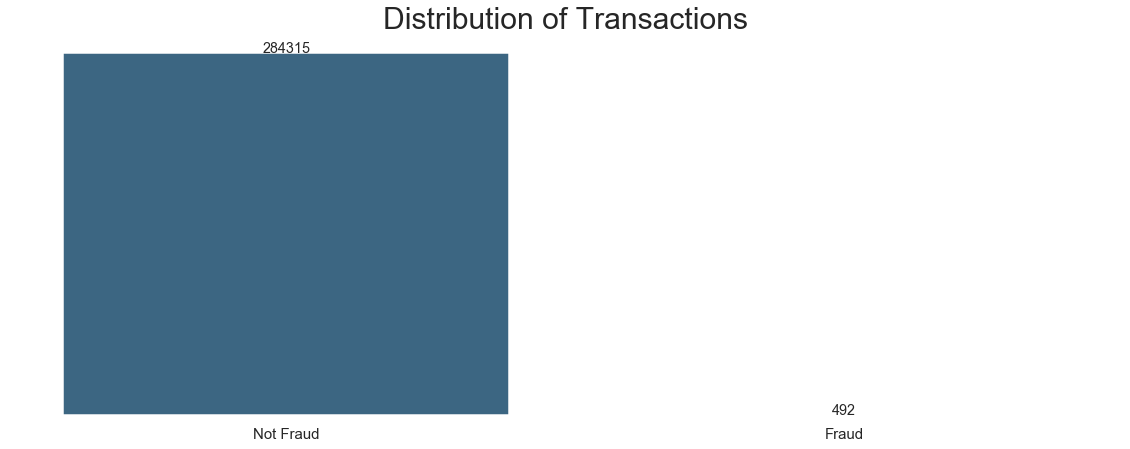

In [5]:
# using seaborn countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha='center')
    
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [6]:
# print percentage of questions where target == 1
(len(df.loc[df.Class == 1])) / (len(df.loc[df.Class == 0])) * 100

0.17304750013189596

We see that we have here a very imbalanced dataset, with just .17% data of class 1 and the rest belonging to class 0.

In [7]:
# Prepare data for modeling
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [9]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels:', (np.unique(dummy_pred)))

# checking accuracy
print('Test score:', accuracy_score(y_test, dummy_pred))

Unique predicted labels: [0]
Test score: 0.9981461194910255


We see that a dummy classifier which only predicts 0 for all the cases is able to achieve an accuracy of more than 99.8%. This is because of data imbalance.

In [10]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Predict on testing set
lr_pred = lr.predict(X_test)

In [11]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9992135052386169

In [12]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    71108
1       94
Name: 0, dtype: int64

It is clear that Logistic Regression performed better than the dummy classifier, as it was also able to predict some 1's. Can we do better? <br>
Accuracy isn't the best criteria as we would like to identify maximum number of fraudulent cases possible. <br>
Hence, F1 score will be a better criterion since it takes into account precision and recall which deal with true positives, false positives and false negatives.

In [15]:
# f1 score
f1_score(y_test, lr_pred)

0.7522123893805309

In [16]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,71061,9
1,47,85


In [17]:
recall_score(y_test, lr_pred)

0.6439393939393939

Although we achieved a very high accuracy, our F1 score and recall score metrics are not good. Hence, we need to change our decision algorithm.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.999592708069998

In [20]:
# f1 score
f1_score(y_test, rfc_pred)

0.8786610878661087

In [21]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,71068,2
1,27,105


In [22]:
# recall score
recall_score(y_test, rfc_pred)

0.7954545454545454

We shall now see resampling techniques for making our data lesser imbalanced. <br>
Resampling should only be done after splitting training and testing data, otherwise our training and testing data might have same data points; which may cause failure in detecting overfitting.

In [23]:
from sklearn.utils import resample

In [24]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

In [25]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [26]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


In [28]:
# separate minority and majority classes
not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]

# upsample minority
fraud_upsampled = resample(fraud,
                           replace=True, # sample with replacement
                           n_samples = len(not_fraud), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [29]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [30]:
# checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [31]:
# f1 score
f1_score(y_test, upsampled_pred)

0.14375000000000002

In [32]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69717,1353
1,17,115


In [33]:
recall_score(y_test, upsampled_pred)

0.8712121212121212

Accuracy decreased after upsampling but the model is now predicting both classes more equally.

In [34]:
# Undersampling majority class
# still using separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                 replace = False, # sample without replacement
                                 n_samples = len(fraud), # match minority n
                                 random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [35]:
# trying logistic regression again with undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [36]:
# checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9758574197354007

In [37]:
# f1 score
f1_score(y_test, undersampled_pred)

0.11710323574730355

In [38]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,69369,1701
1,18,114


In [39]:
# recall score
recall_score(y_test, undersampled_pred)

0.8636363636363636

Downsampling produced a higher recall score than upsampling. However, it is of concern that the number of total samples used to train the model is small.

In [42]:
# Generating synthetic samples
# SMOTE - Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

In [45]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [46]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9858571388444145

In [47]:
# f1 score
f1_score(y_test, smote_pred)

0.18461538461538463

In [48]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,70081,989
1,18,114


In [49]:
recall_score(y_test, smote_pred)

0.8636363636363636